# AdaBoost 회귀 기본코드

## #01. 준비작업

### [1] 패키지 가져오기

In [1]:
# 연결된 모듈이 업데이트 되면 즉시 자동 로드함
%load_ext autoreload
%autoreload 2

from hossam.util import *
from hossam.plot import *
from hossam.analysis import *
from hossam.regression import *

# 배깅 회귀
from sklearn.ensemble import AdaBoostRegressor

### [2] 데이터 가져오기


In [2]:
origin = my_read_excel("https://data.hossam.kr/mldata/boston.xlsx", info=False)


상위 5개 행
+----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------+
|    |    CRIM |   ZN |   INDUS |   CHAS |   NOX |    RM |   AGE |    DIS |   RAD |   TAX |   PTRATIO |      B |   LSTAT |   MEDV |
|----+---------+------+---------+--------+-------+-------+-------+--------+-------+-------+-----------+--------+---------+--------|
|  0 | 0.00632 |   18 |    2.31 |      0 | 0.538 | 6.575 |  65.2 |   4.09 |     1 |   296 |      15.3 |  396.9 |    4.98 |     24 |
|  1 | 0.02731 |    0 |    7.07 |      0 | 0.469 | 6.421 |  78.9 | 4.9671 |     2 |   242 |      17.8 |  396.9 |    9.14 |   21.6 |
|  2 | 0.02729 |    0 |    7.07 |      0 | 0.469 | 7.185 |  61.1 | 4.9671 |     2 |   242 |      17.8 | 392.83 |    4.03 |   34.7 |
|  3 | 0.03237 |    0 |    2.18 |      0 | 0.458 | 6.998 |  45.8 | 6.0622 |     3 |   222 |      18.7 | 394.63 |    2.94 |   33.4 |
|  4 | 0.06905 |    0 |    2.18 |      0 | 0.458 | 7.147 |  54.2 | 

### [3] 훈련/검증 데이터 분할 및 데이터 표준화


In [3]:
x_train, x_test, y_train, y_test = my_train_test_split(origin, "MEDV", scalling=True)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

## #02. AdaBoost

### [1] 부스팅에 사용할 최적의 알고리즘 선정


가지치기를 하지 않습니다.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_search.py:318: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration 



==================== 모델 성능 비교 ====================
+-----------------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------+
|                       |   결정계수(R2) |   평균절대오차(MAE) |   평균제곱오차(MSE) |   평균오차(RMSE) |   평균 절대 백분오차 비율(MAPE) |   평균 비율 오차(MPE) |
|-----------------------+----------------+---------------------+---------------------+------------------+---------------------------------+-----------------------|
| SVR                   |       0.522683 |             3.75378 |             38.8672 |          6.23436 |                         17.6361 |               1.94136 |
| SGDRegressor          |       0.574904 |             3.90074 |             34.6149 |          5.88344 |                         18.6915 |              -3.94553 |
| Ridge                 |       0.579142 |             3.85534 |             34.2698 |          5.85404 |                         18.3134 |               -3.3344 |

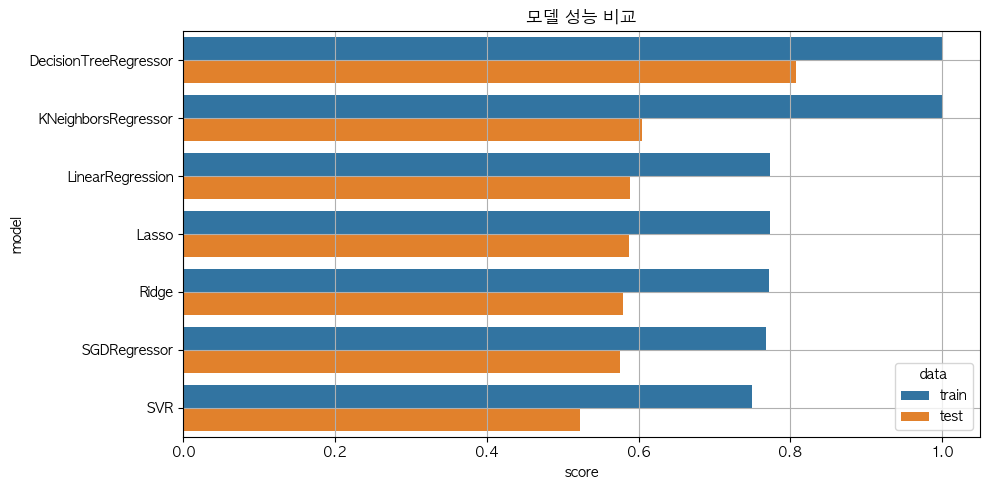

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |            1 |     0.807113 |
| 평균절대오차(MAE)             |            0 |      2.89608 |
| 평균제곱오차(MSE)             |            0 |      15.7065 |
| 평균오차(RMSE)                |            0 |      3.96314 |
| 평균 절대 백분오차 비율(MAPE) |            0 |      15.3313 |
| 평균 비율 오차(MPE)           |            0 |     -2.07076 |
+-------------------------------+--------------+--------------+

[학습곡선]


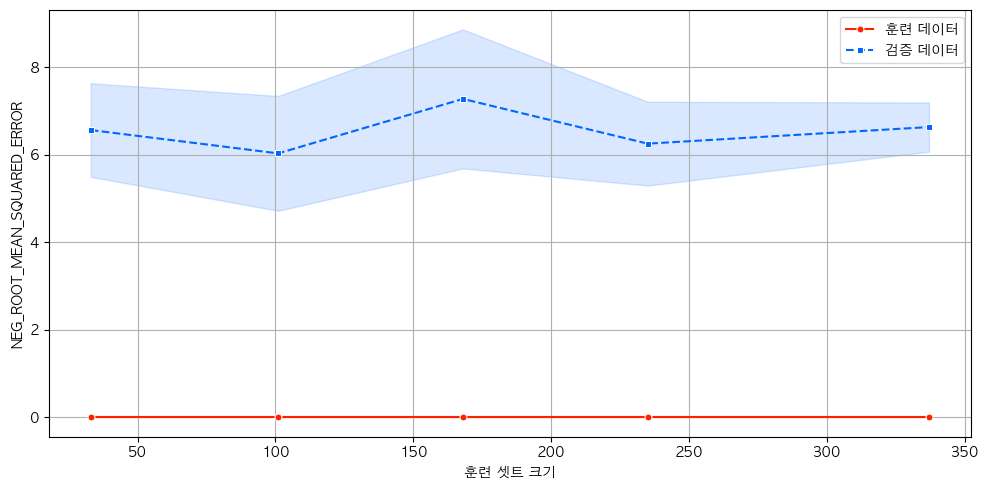

+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 2.09518 |
|  1 | MEDV       | ZN         | 2.33731 |
|  2 | MEDV       | INDUS      |  4.9238 |
|  3 | MEDV       | CHAS       | 1.32047 |
|  4 | MEDV       | NOX        | 4.17384 |
|  5 | MEDV       | RM         | 1.82706 |
|  6 | MEDV       | AGE        | 2.93317 |
|  7 | MEDV       | DIS        | 4.41185 |
|  8 | MEDV       | RAD        | 9.98804 |
|  9 | MEDV       | TAX        | 10.5503 |
| 10 | MEDV       | PTRATIO    | 1.88398 |
| 11 | MEDV       | B          |  1.5563 |
| 12 | MEDV       | LSTAT      |  2.8052 |
+----+------------+------------+---------+



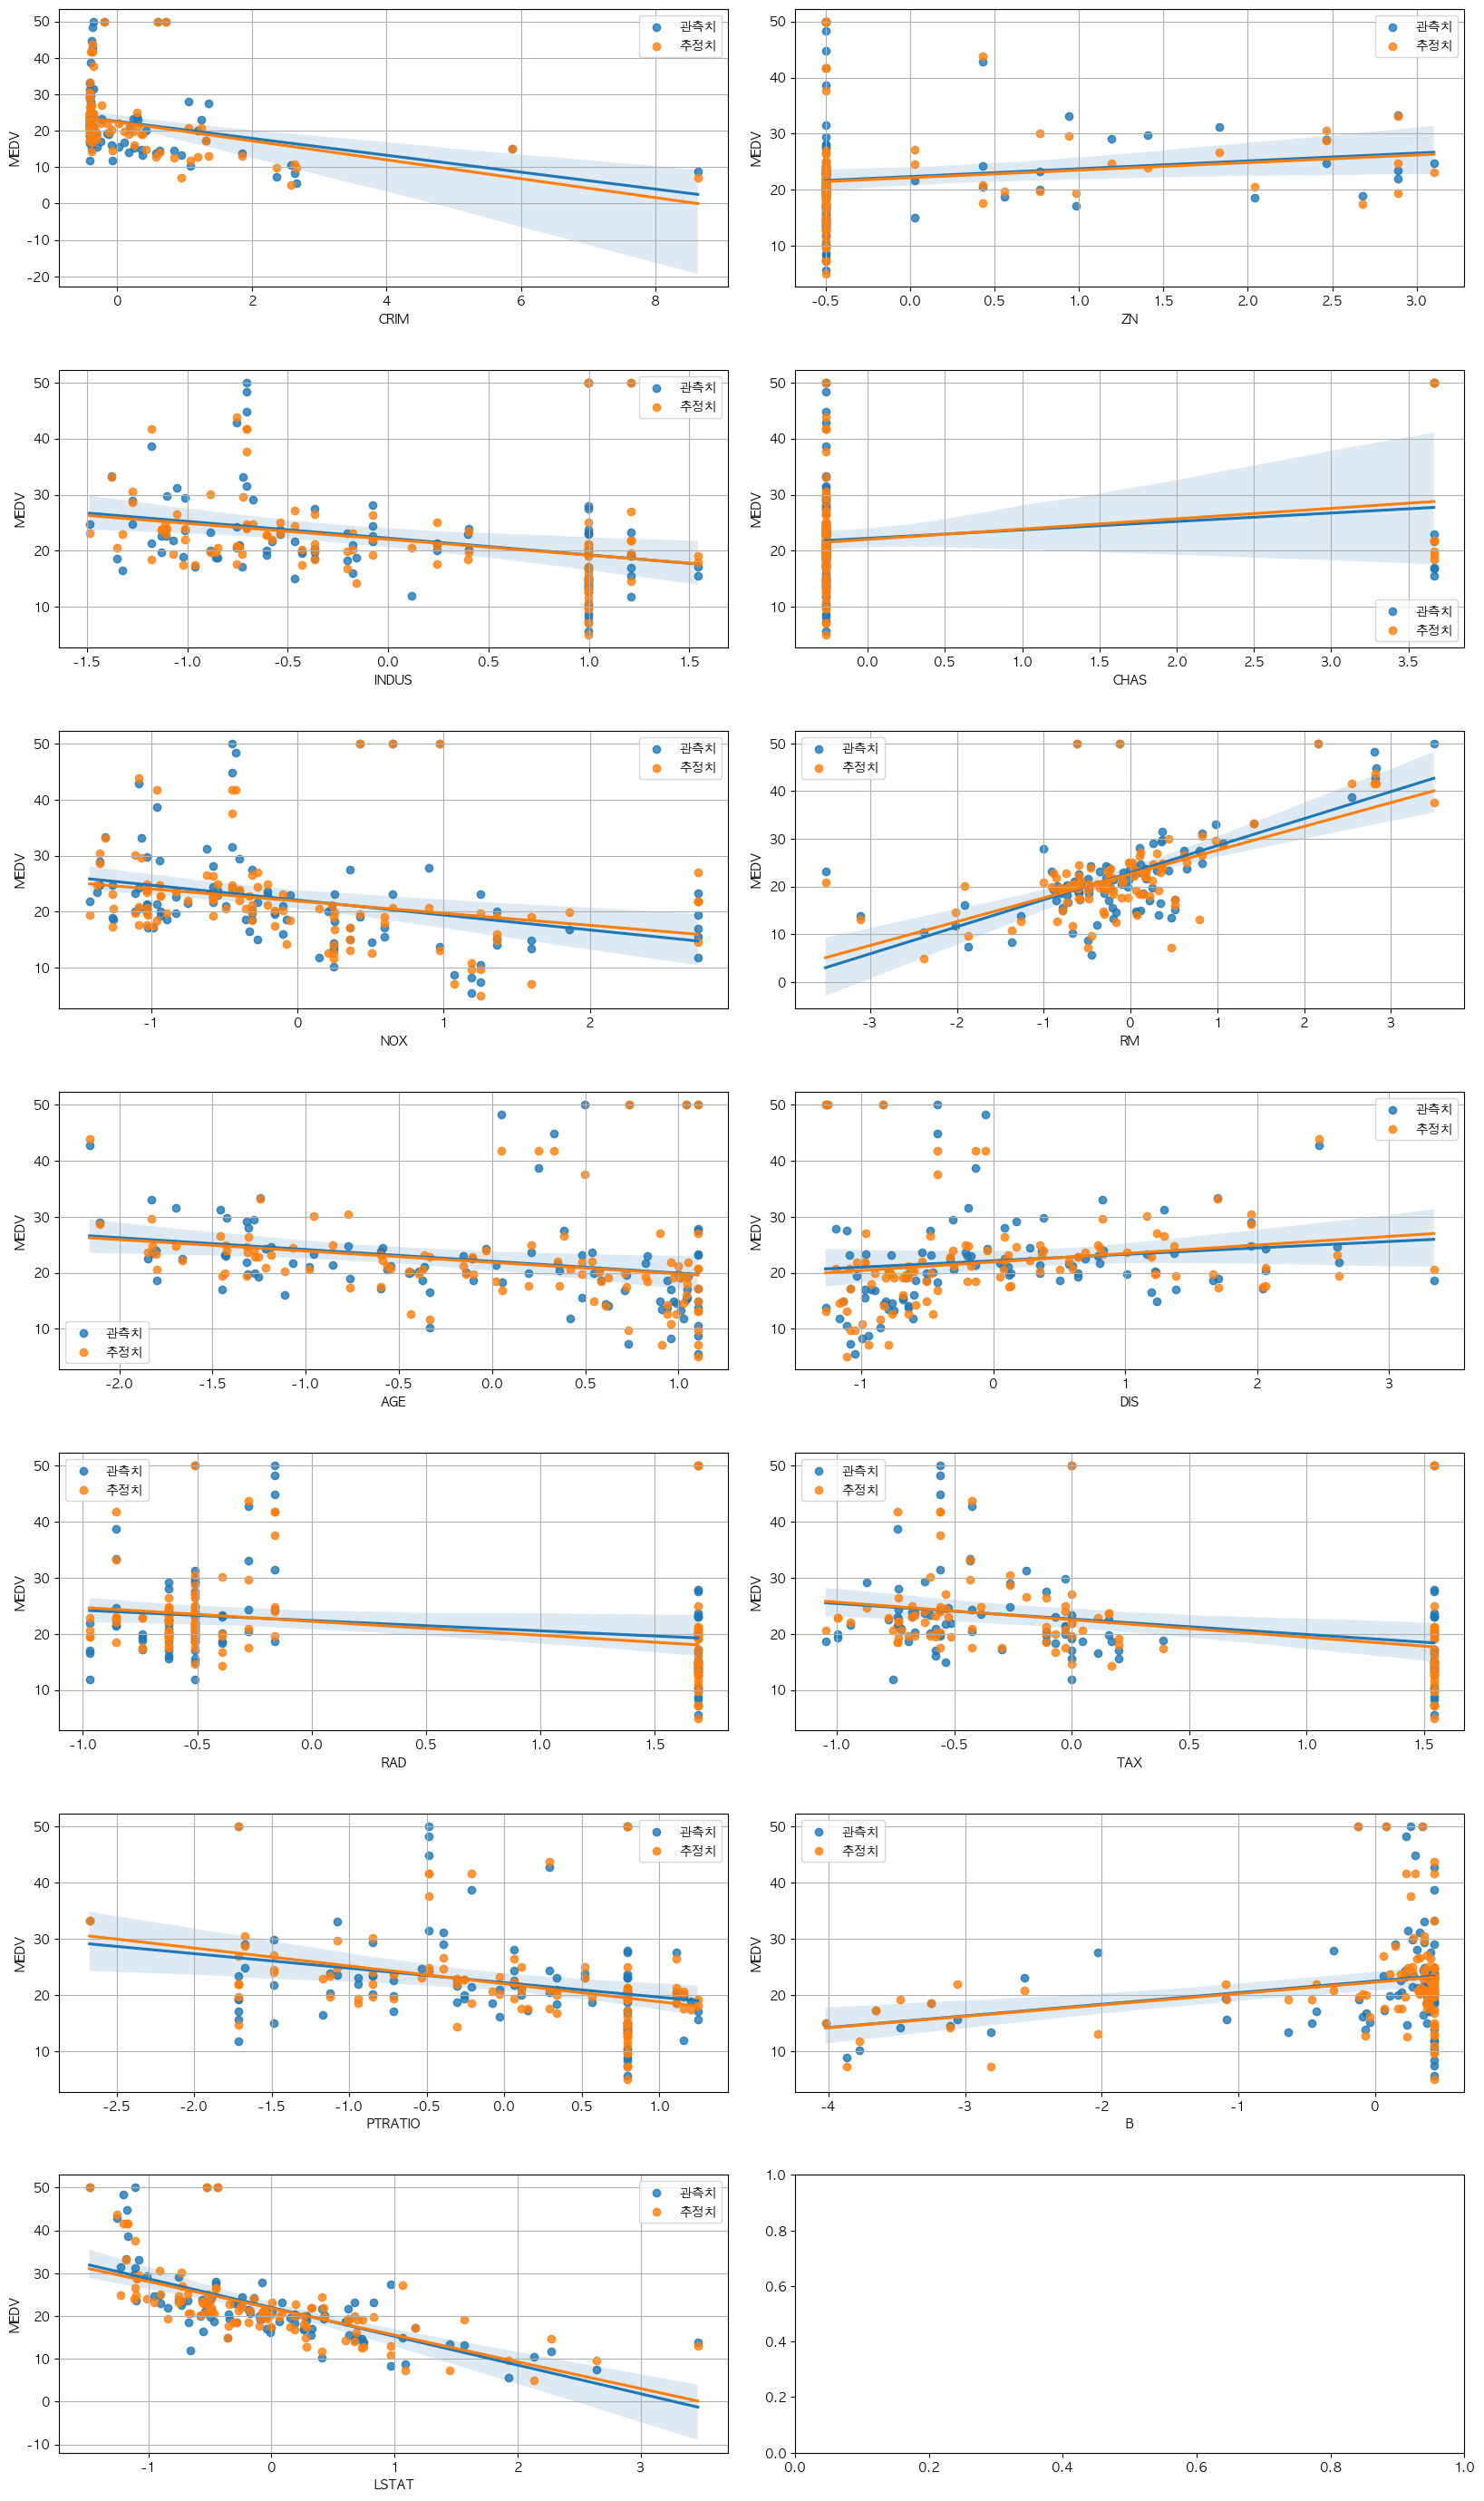

DecisionTreeRegressor(criterion='poisson', random_state=0)

In [4]:
estimator = my_regression(
    x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test
)
best_estimator = estimator["best"]
best_estimator

### [2] AdaBoost 설정

| 하이퍼 파라미터    | 기본값                | 설명                                        | 추천사항                           |
|----------------|--------------------|-------------------------------------------|---------------------------------|
| `base_estimator` | `None` (DecisionTreeClassifier) | 사용할 약한 학습기. `None` 시 최대 깊이 1의 결정 트리 사용. | 복잡도에 맞게 모델 선택 가능.        |
| `n_estimators` | `50` | 약한 학습기의 최대 개수.                       | 과적합 주의하며 증가 가능.           |
| `learning_rate` | `1.0` | 학습률.                                     | 낮은 학습률과 더 많은 학습기의 조합 권장. |
| `loss` | `‘linear’` | 손실함수          | `‘linear’` , `‘square’` , `‘exponential’` 중에서 실험을 통해 선택                   |
| `random_state` | `None` | 난수 시드.                                   | 재현 가능한 결과를 위해 설정.         |


[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                               |   훈련데이터 |   검증데이터 |
|-------------------------------+--------------+--------------|
| 결정계수(R2)                  |            1 |     0.727592 |
| 평균절대오차(MAE)             |            0 |      2.81373 |
| 평균제곱오차(MSE)             |            0 |      22.1818 |
| 평균오차(RMSE)                |            0 |      4.70975 |
| 평균 절대 백분오차 비율(MAPE) |            0 |      12.6903 |
| 평균 비율 오차(MPE)           |            0 |    -0.732212 |
+-------------------------------+--------------+--------------+

[학습곡선]


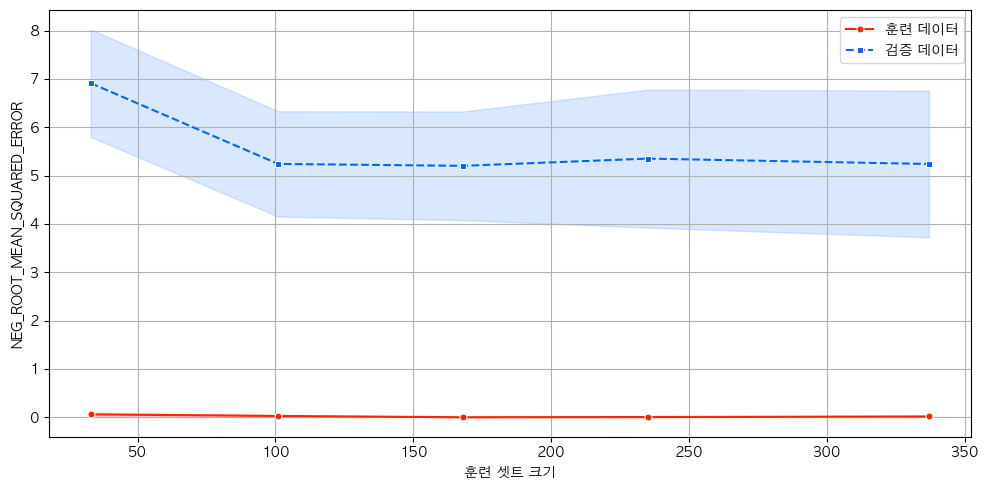

+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 2.09518 |
|  1 | MEDV       | ZN         | 2.33731 |
|  2 | MEDV       | INDUS      |  4.9238 |
|  3 | MEDV       | CHAS       | 1.32047 |
|  4 | MEDV       | NOX        | 4.17384 |
|  5 | MEDV       | RM         | 1.82706 |
|  6 | MEDV       | AGE        | 2.93317 |
|  7 | MEDV       | DIS        | 4.41185 |
|  8 | MEDV       | RAD        | 9.98804 |
|  9 | MEDV       | TAX        | 10.5503 |
| 10 | MEDV       | PTRATIO    | 1.88398 |
| 11 | MEDV       | B          |  1.5563 |
| 12 | MEDV       | LSTAT      |  2.8052 |
+----+------------+------------+---------+

CPU times: user 533 ms, sys: 6.44 ms, total: 540 ms
Wall time: 733 ms


In [5]:
%%time

bagging = AdaBoostRegressor(
    estimator=best_estimator,
    n_estimators=100,
    learning_rate=0.1,
    loss="linear",
    random_state=get_random_state(),
)

bagging.fit(X=x_train, y=y_train)

my_regression_result(estimator=bagging, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

my_regression_report(estimator=bagging, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

## #03. 모듈화 기능 확인

[교차검증 TOP5]
+----+----------------+-----------------+------------------------+-------------------+
|    |   n_estimators |   learning_rate | estimator__criterion   |   mean_test_score |
|----+----------------+-----------------+------------------------+-------------------|
|  0 |             20 |               1 | absolute_error         |          0.894602 |
|  1 |             50 |               1 | poisson                |          0.875843 |
|  2 |            100 |               1 | friedman_mse           |          0.872769 |
|  3 |             50 |             0.1 | friedman_mse           |          0.865564 |
|  4 |             20 |               1 | poisson                |            0.8571 |
+----+----------------+-----------------+------------------------+-------------------+

[Best Params]
{'n_estimators': 20, 'learning_rate': 1, 'estimator__criterion': 'absolute_error'}

[회귀분석 성능평가]
+-------------------------------+--------------+--------------+
|                             

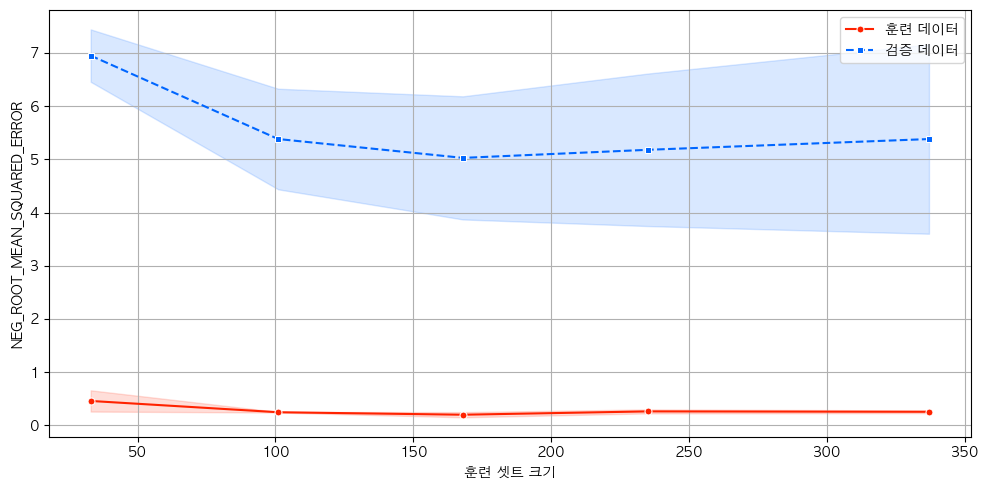


+----+------------+------------+---------+
|    | 종속변수   | 독립변수   |     VIF |
|----+------------+------------+---------|
|  0 | MEDV       | CRIM       | 2.09518 |
|  1 | MEDV       | ZN         | 2.33731 |
|  2 | MEDV       | INDUS      |  4.9238 |
|  3 | MEDV       | CHAS       | 1.32047 |
|  4 | MEDV       | NOX        | 4.17384 |
|  5 | MEDV       | RM         | 1.82706 |
|  6 | MEDV       | AGE        | 2.93317 |
|  7 | MEDV       | DIS        | 4.41185 |
|  8 | MEDV       | RAD        | 9.98804 |
|  9 | MEDV       | TAX        | 10.5503 |
| 10 | MEDV       | PTRATIO    | 1.88398 |
| 11 | MEDV       | B          |  1.5563 |
| 12 | MEDV       | LSTAT      |  2.8052 |
+----+------------+------------+---------+



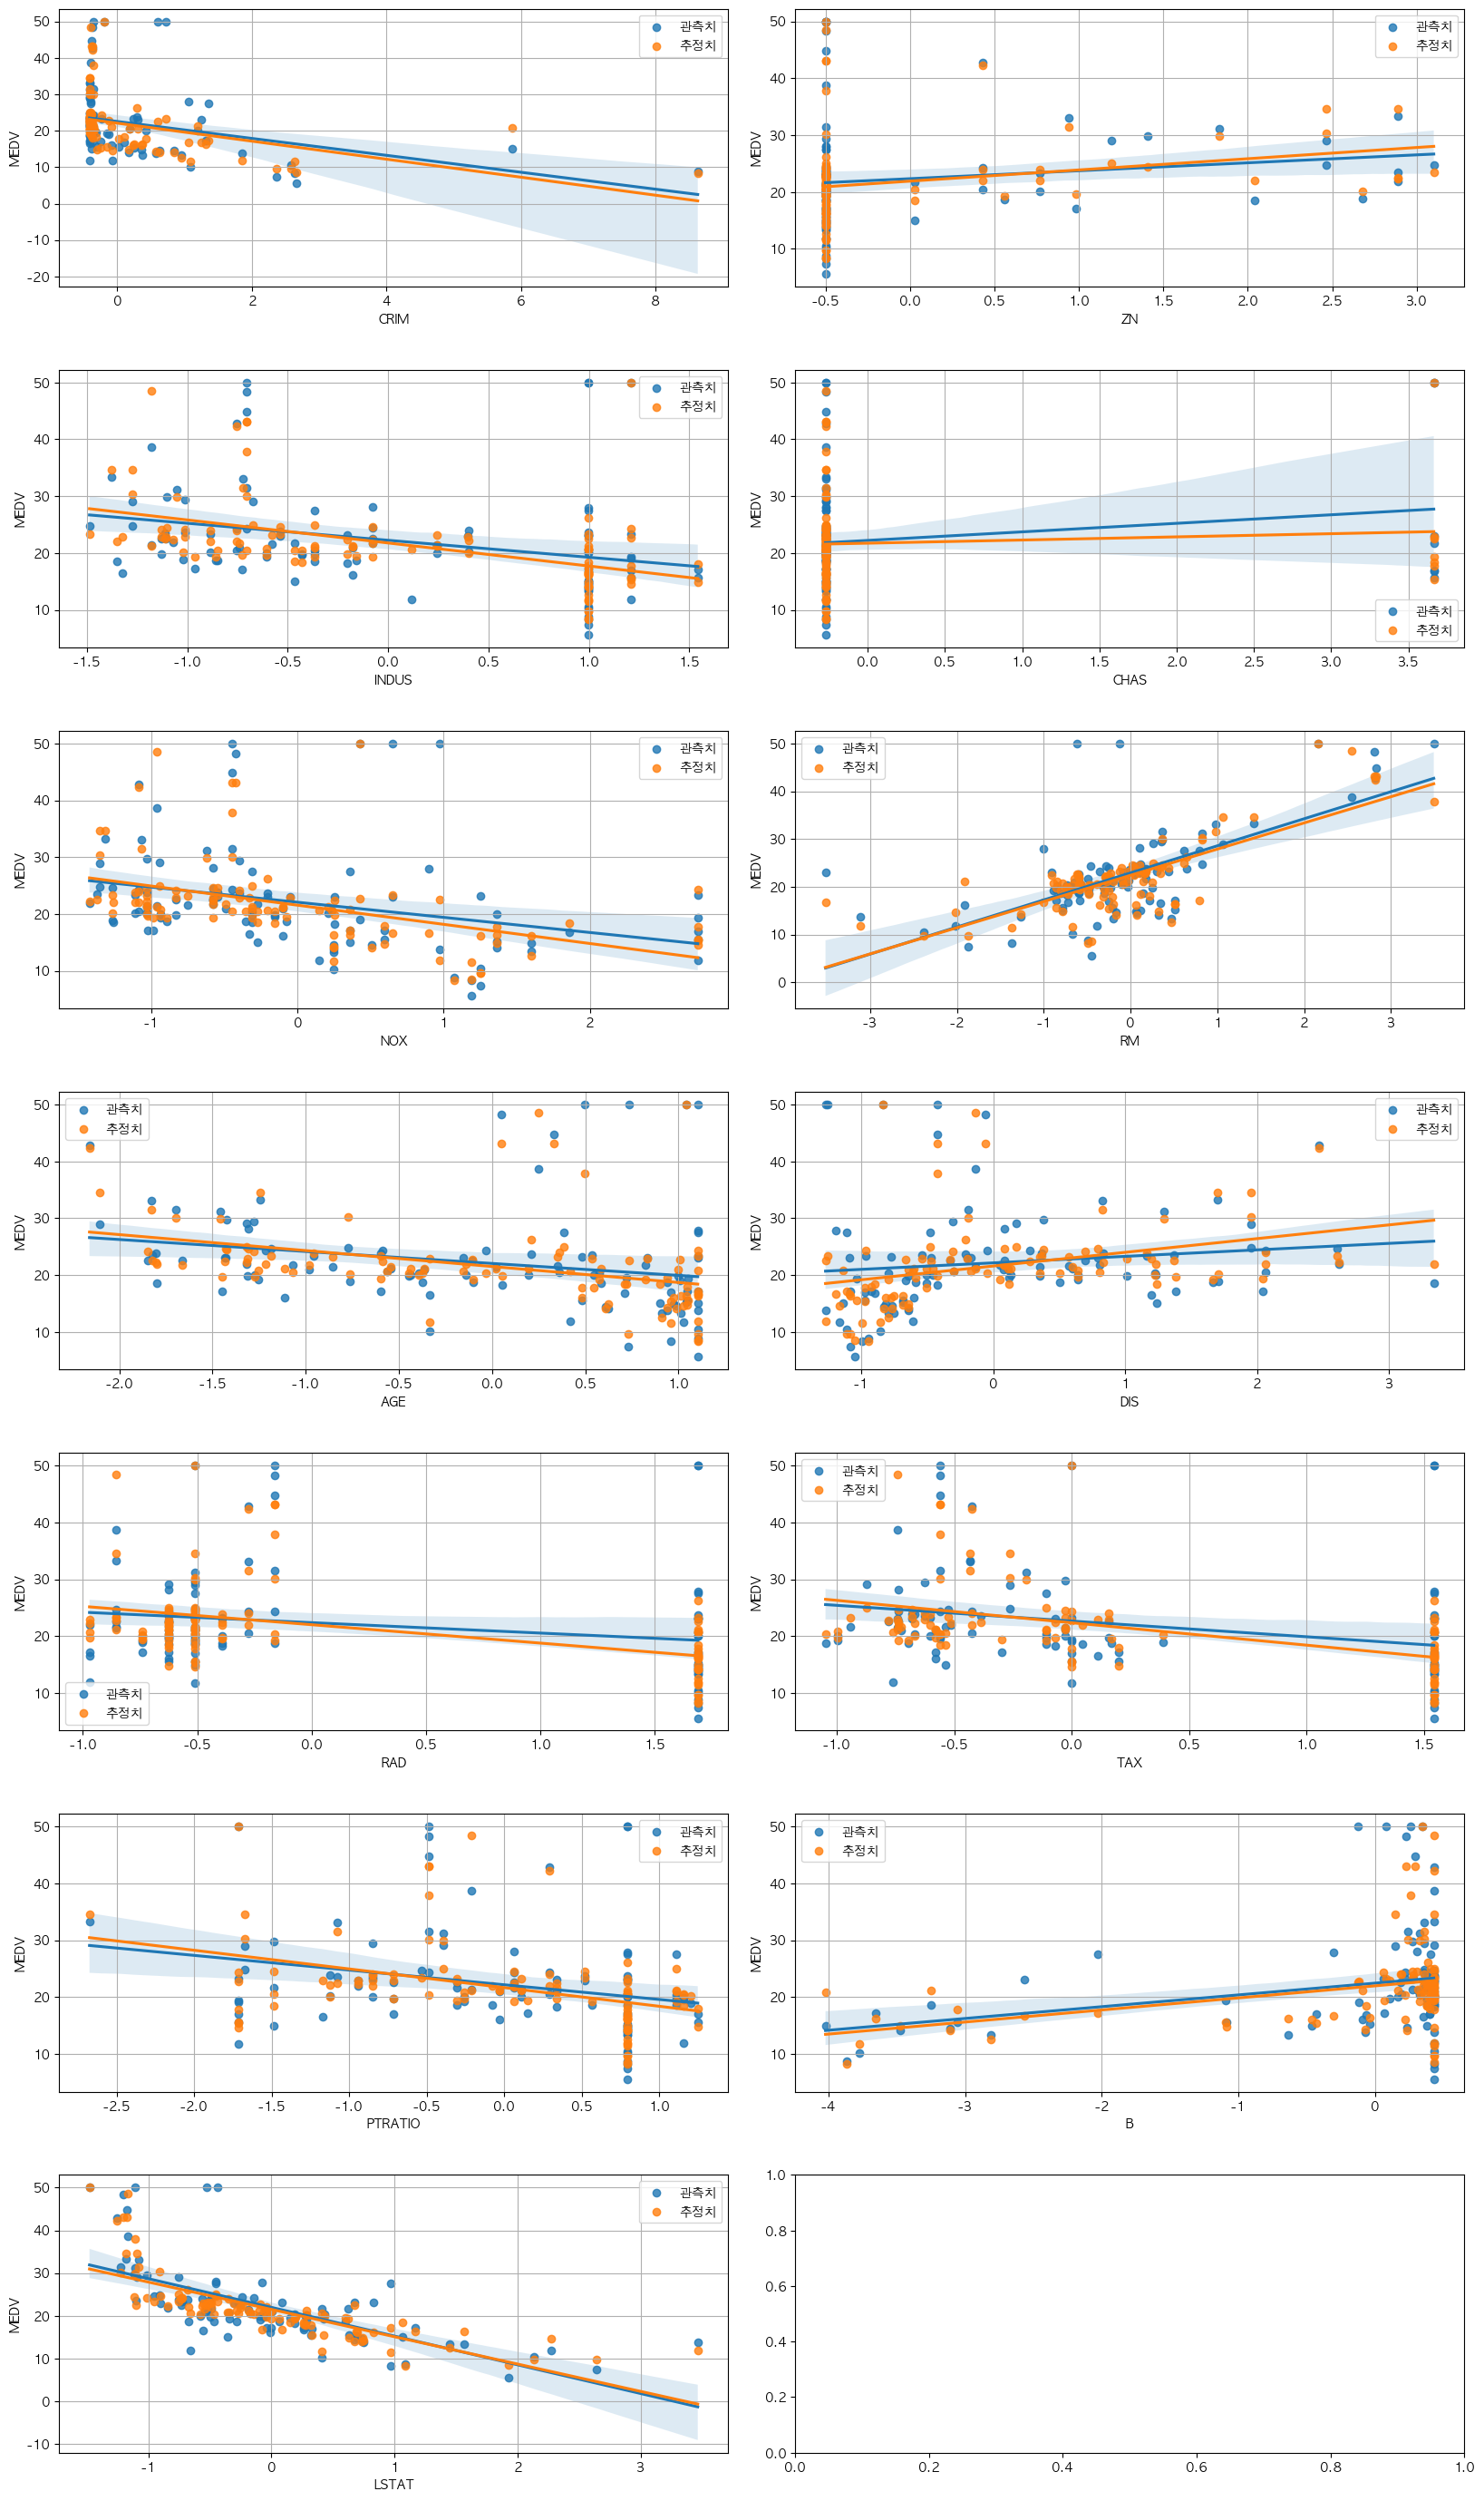

AdaBoostRegressor(estimator=DecisionTreeRegressor(criterion='absolute_error',
                                                  random_state=0),
                  learning_rate=1, n_estimators=20, random_state=0)

In [7]:
# case1 - 최적 모형에 대한 객체를 전달하는 경우
my_ada_regression(estimator=best_estimator, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

# case2 - 최적 모형에 대한 클래스를 전달하는 경우
# my_ada_regression(estimator=DecisionTreeRegressor, x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

# case3 - 최적모형 전달 하지 않음 (모듈 내부에서 최적 모형 탐색 후 수행함)
# my_ada_regression(x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)